In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

print('keras version ', keras.__version__)

keras version  2.2.4


In [76]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


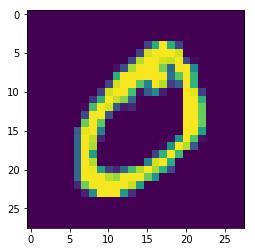

In [77]:
plt.imshow(x_train[1])
plt.show()

In [78]:
img_rows = x_train.shape[1] # This tells tensorflow the height of each image, in this case 28
img_cols = x_train.shape[2] # This tells tensorflow the width of each image, in this case 28
num_classes = 10 # This defines the number of possible clasifications we could have

In [79]:
print(K.image_data_format())

# This reshapes the x_train data so that it has a third dimension for the depth of pixels
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

# This specifies what each image shape will look like when passed into the network
input_shape = (img_rows, img_cols, 1)

channels_last


In [80]:
# This converts all values inside of the data to be float32
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

# Each pixel in the image has a value between [0-255], so dividing by 255 will make the range between [0-1] 
x_train = x_train / 255
x_val = x_val/ 255

In [81]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [82]:
# RUN THIS CODE ONLY ONCE
print('y_train shape: ', y_train.shape)
for i in range(10):
    print(y_train[i])
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print('New y_train shape: ', y_train.shape)

y_train shape:  (60000,)
5
0
4
1
9
2
1
3
1
4
New y_train shape:  (60000, 10)


In [83]:
print('New y_train shape: ', y_train.shape)
# (60000, 10)
print('First 10 y_train elements, reshaped:\n', y_train[:10])
# An array of 10 arrays, each with 10 elements, 
# all zeros except at index 5, 0, 4, 1, 9 etc.

New y_train shape:  (60000, 10)
First 10 y_train elements, reshaped:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [84]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 5, 128)         8320      
__________

In [85]:
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
# Note: hwchong, elitedatascience use 32 for second Conv2D
model_c.add(Conv2D(64, (3, 3), activation='relu'))
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_c.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

In [86]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

In [ ]:
model_c.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model_c.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3001 - acc: 0.9073 - val_loss: 0.0591 - val_acc: 0.9814
Epoch 2/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0991 - acc: 0.9711 - val_loss: 0.0419 - val_acc: 0.9872
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0734 - acc: 0.9783 - val_loss: 0.0373 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0596 - acc: 0.9825 - val_loss: 0.0297 - val_acc: 0.9901
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0497 - acc: 0.9848 - val_loss: 0.0334 - val_acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0450 - acc: 0.9860 - val_loss: 0.0273 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0281 - val_acc